### Bibliotecas necessárias 

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

import jax.numpy as jnp
from jax import random, jit, vmap
import jax.scipy as jsp

import matplotlib.pyplot as plt

import pywt

#para carregar o .mat 
from scipy.io import loadmat

In [38]:
##### Carregamento dos datasets #####

GC = loadmat('GC_LFPs.mat')
LFP = loadmat('LFP_HG_HFO.mat')

In [39]:
print(GC.keys())
print(LFP.keys())

print(f"SHAPE: {GC['LFP'].shape}")
print(f"SHAPE lfpHFO: {LFP['lfpHFO'].shape} SHAPE lfpHG: {LFP['lfpHG'].shape}")

dict_keys(['__header__', '__version__', '__globals__', 'LFP'])
dict_keys(['__header__', '__version__', '__globals__', 'lfpHFO', 'lfpHG'])
SHAPE: (144, 3500)
SHAPE lfpHFO: (1, 300000) SHAPE lfpHG: (1, 300000)


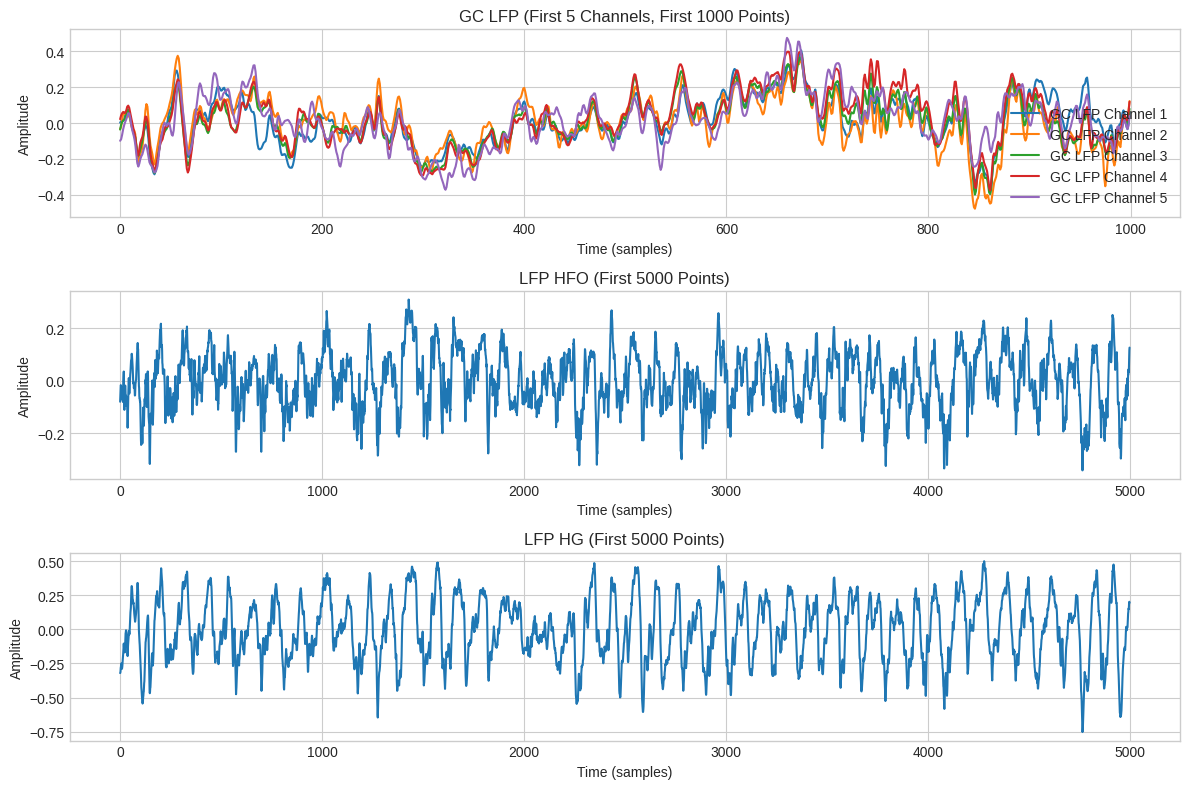

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8)) 

num_channels_to_plot = 5
data_points_to_plot_gc = 1000

for i in range(min(num_channels_to_plot, GC['LFP'].shape[0])): 
    ax[0].plot(GC['LFP'][i, :data_points_to_plot_gc].T, label=f'GC LFP Channel {i+1}')
ax[0].set_title(f'GC LFP (First {num_channels_to_plot} Channels, First {data_points_to_plot_gc} Points)')
ax[0].set_xlabel('Time (samples)') 
ax[0].set_ylabel('Amplitude')
ax[0].legend() 


data_points_to_plot_lfp = 5000
ax[1].plot(LFP['lfpHFO'][0, :data_points_to_plot_lfp], label='LFP HFO') 
ax[1].set_title(f'LFP HFO (First {data_points_to_plot_lfp} Points)')
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')


ax[2].plot(LFP['lfpHG'][0, :data_points_to_plot_lfp], label='LFP HG') 
ax[2].set_title(f'LFP HG (First {data_points_to_plot_lfp} Points)')
ax[2].set_xlabel('Time (samples)')
ax[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.grid(True)
plt.show()

[-0.07958984 -0.05908203 -0.03564453 ...  0.11328125  0.12988281
  0.12353516]
[-0.3203125  -0.31738281 -0.30712891 ...  0.16015625  0.16552734
  0.17041016]


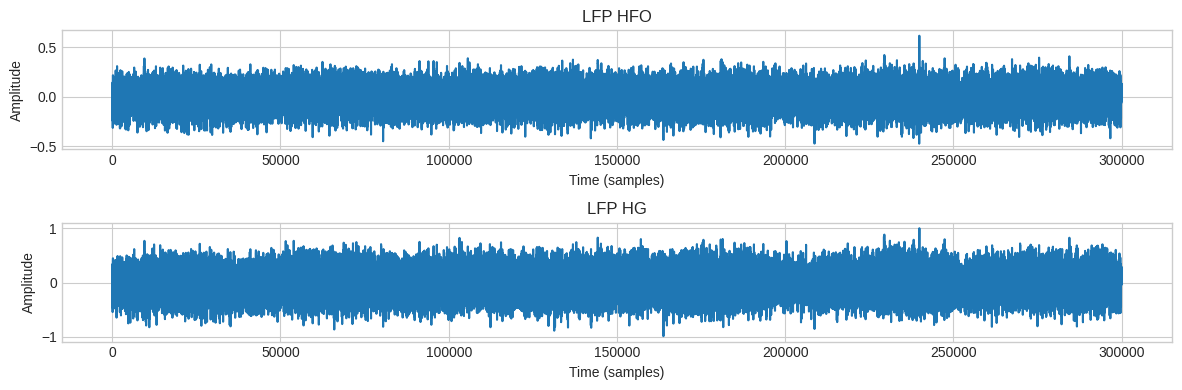

In [41]:
print(LFP['lfpHFO'][0, :])

print(LFP['lfpHG'][0, :])

fig , ax = plt.subplots(2, 1, figsize=(12, 4))

ax[0].plot(LFP['lfpHFO'][0, :], label='LFP HFO')
ax[0].set_title('LFP HFO')
ax[0].set_xlabel('Time (samples)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(LFP['lfpHG'][0, :], label='LFP HG')
ax[1].set_title('LFP HG')
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.grid(True)
plt.show()

### Questões 1-5

Dataset LFP_HFO_HG

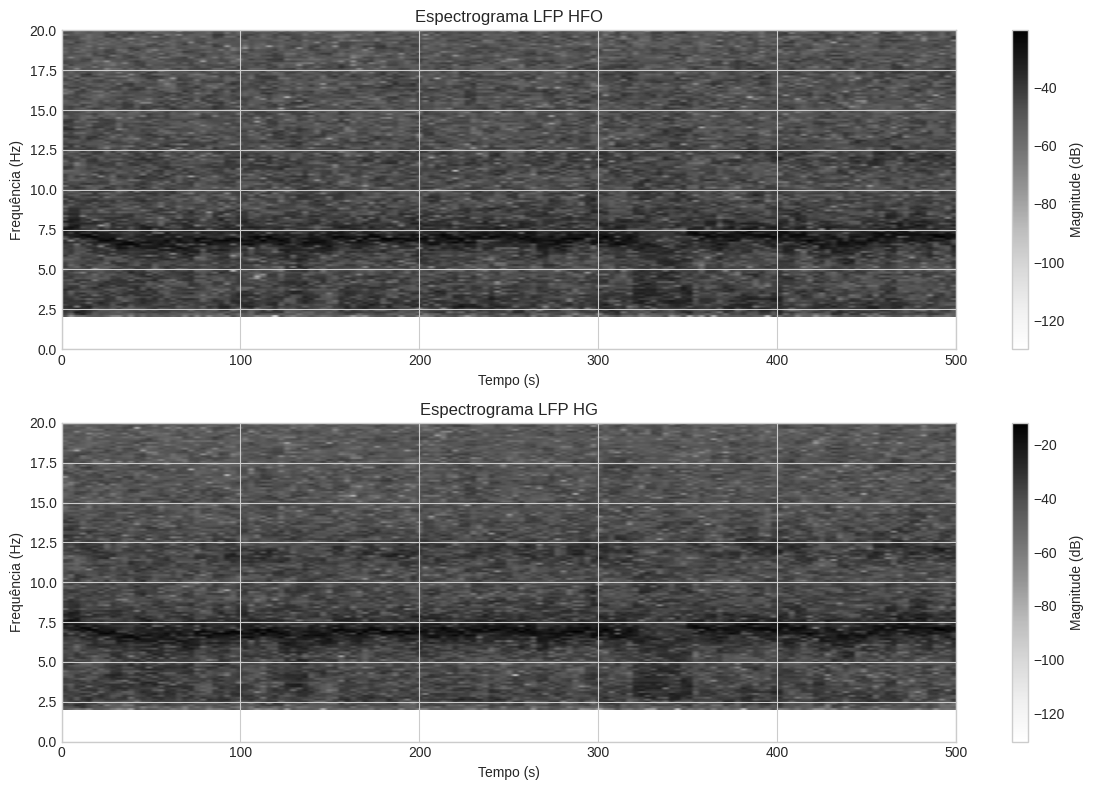

In [42]:
### Computando o TFD espectrograma ### 

lfp = LFP['lfpHFO'][0, :]
hg = LFP['lfpHG'][0, :]

fs = 1000  # Frequência de amostragem

nfft = int(fs / 0.2)

tfd_hfo = sp.signal.spectrogram(
    lfp,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

tfd_hg  = sp.signal.spectrogram(
    hg,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

# Plotando o espectrograma
fig , ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].imshow(10 * np.log10(tfd_hfo[2]), aspect='auto', origin='lower', 
           extent=[tfd_hfo[0][0], tfd_hfo[0][-1], tfd_hfo[1][0], tfd_hfo[1][-1]])
ax[0].set_title('Espectrograma LFP HFO')
ax[0].set_xlabel('Tempo (s)')
ax[0].set_ylabel('Frequência (Hz)')
ax[0].set_ylim(0,20) #hz

ax[1].imshow(10 * np.log10(tfd_hg[2]), aspect='auto', origin='lower', 
           extent=[tfd_hg[0][0], tfd_hg[0][-1], tfd_hg[1][0], tfd_hg[1][-1]])
ax[1].set_title('Espectrograma LFP HG')
ax[1].set_xlabel('Tempo (s)')
ax[1].set_ylabel('Frequência (Hz)')
ax[1].set_ylim(0,20) #hz
plt.colorbar(ax[0].images[0], ax=ax[0], label='Magnitude (dB)')
plt.colorbar(ax[1].images[0], ax=ax[1], label='Magnitude (dB)')
plt.tight_layout()
plt.show()

### Questão 2

Plotando a série temporal de potência média na faixa das oscilações teta 

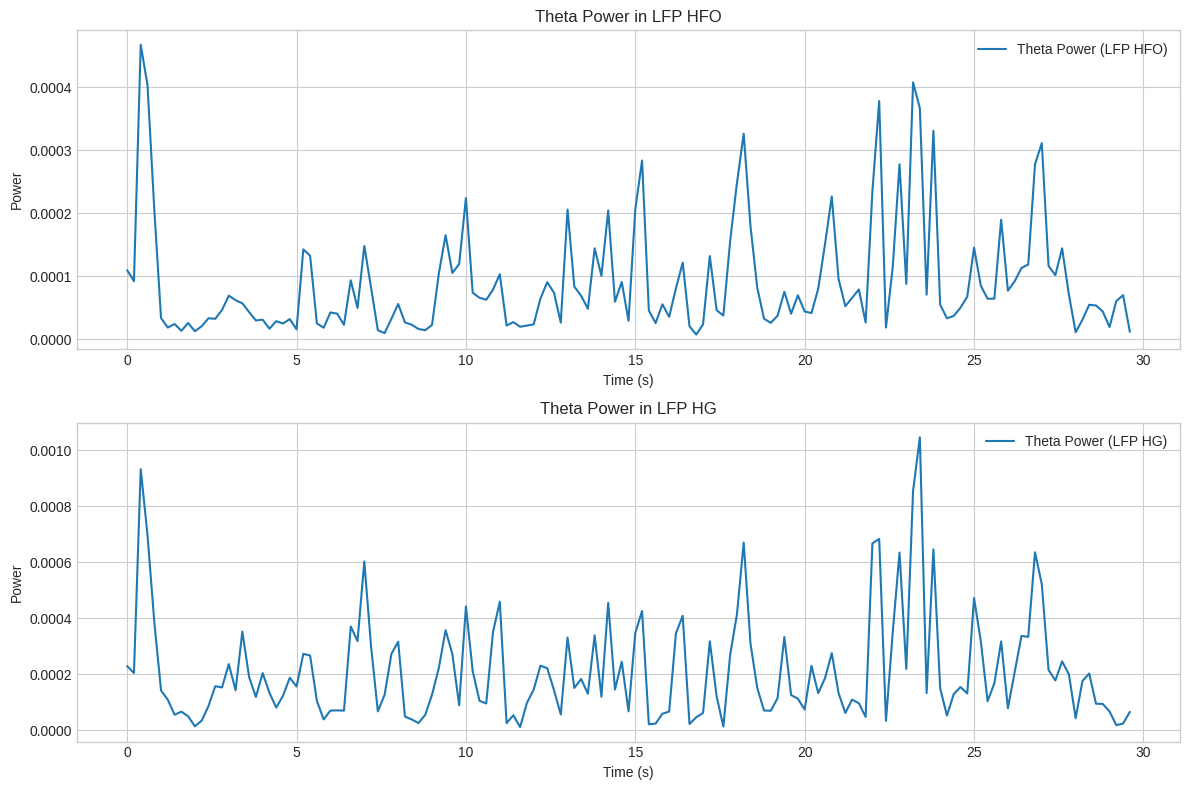

In [43]:
tfd_hfo , freqs , Sxx = sp.signal.spectrogram(
    lfp,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

tfd_hg , freqs_hg , Shg = sp.signal.spectrogram(
    hg,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)


theta = (6 , 10)

theta_idx = np.where((freqs >= theta[0]) & (freqs <= theta[1]))[0]

theta_idx2 = np.where((freqs_hg >= theta[0]) & (freqs_hg <= theta[1]))[0]

theta_power = np.mean(Sxx[theta_idx, :], axis=0)
theta_power2 = np.mean(Shg[theta_idx2, :], axis=0)

fig , ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(tfd_hfo[:len(theta_power)], theta_power, label='Theta Power (LFP HFO)')
ax[0].set_title('Theta Power in LFP HFO')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Power')
ax[0].legend()

ax[1].plot(tfd_hg[:len(theta_power2)], theta_power2, label='Theta Power (LFP HG)')
ax[1].set_title('Theta Power in LFP HG')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Power')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Questão 3 

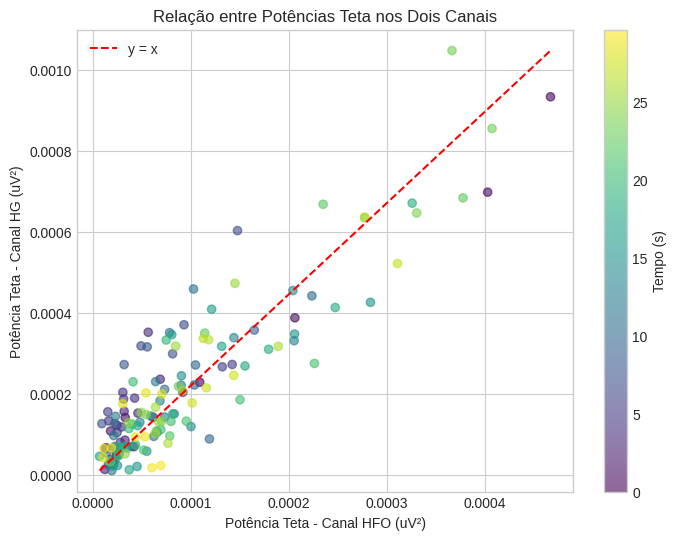

In [44]:
theta_hfo = theta_power
theta_hg = theta_power2

# Use the correct time vectors for coloring
times_hfo = tfd_hfo[:len(theta_hfo)]
times_hg = tfd_hg[:len(theta_hg)]

plt.figure(figsize=(8, 6))
plt.scatter(theta_hfo, theta_hg, c=times_hfo, cmap='viridis', alpha=0.6)
plt.colorbar(label='Tempo (s)')
plt.xlabel('Potência Teta - Canal HFO (uV²)')
plt.ylabel('Potência Teta - Canal HG (uV²)')
plt.title('Relação entre Potências Teta nos Dois Canais')
plt.grid(True)


plt.plot([min(theta_hfo), max(theta_hfo)], [min(theta_hg), max(theta_hg)], 'r--', label='y = x')
plt.legend()

plt.show()

### Questão 4


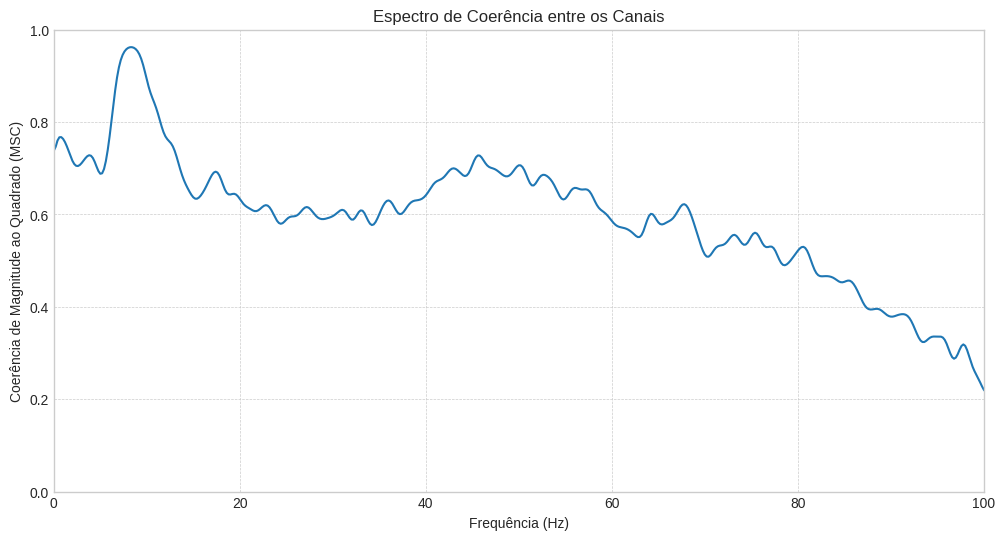

In [45]:
### Algumas constantes 


WINDOW_SECONDS = 1.0
OVERLAP_PERC = 0.5
TARGET_FREQ_RES = 0.2

# Número de pontos por segmento (tamanho da janela)
nperseg = int(WINDOW_SECONDS * fs)

# Número de pontos de sobreposição
noverlap = int(nperseg * OVERLAP_PERC)

# Tamanho da FFT para atingir a resolução de frequência desejada
nfft = int(fs / TARGET_FREQ_RES)

f, Cxy = sp.signal.coherence(
    x=lfp,
    y=hg,
    fs=fs,
    window='hann',  
    nperseg=nperseg,
    noverlap=noverlap,
    nfft=nfft
)

plt.figure(figsize=(12, 6))
plt.plot(f, Cxy)

plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Coerência de Magnitude ao Quadrado (MSC)')
plt.title('Espectro de Coerência entre os Canais')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

### Questão 5

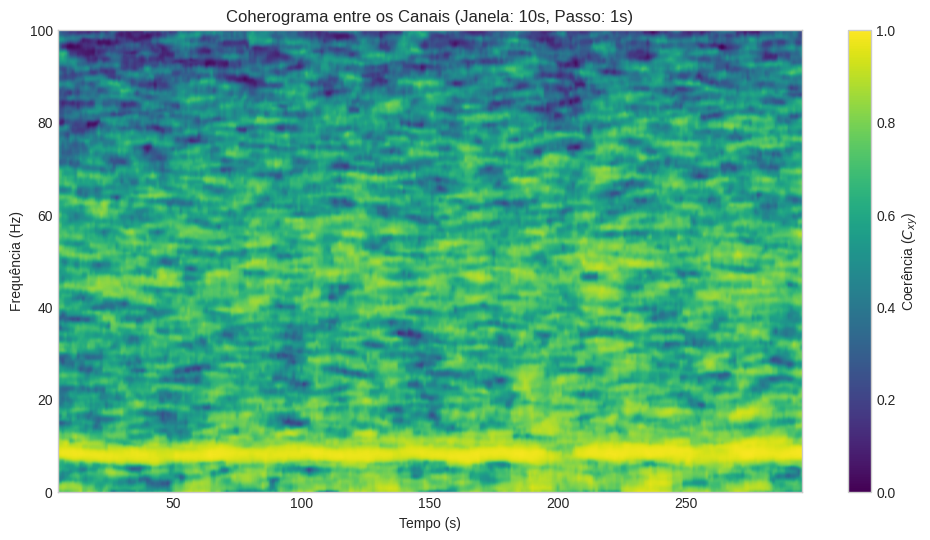

In [46]:
large_window_sec = 10.0
step_sec = 1.0
large_window_samples = int(large_window_sec * fs)
step_samples = int(step_sec * fs)

# Parâmetros INTERNOS para o cálculo da coerência (do exercício anterior)
inner_window_sec = 1.0
inner_nperseg = int(inner_window_sec * fs)
inner_noverlap = int(inner_nperseg * 0.5) # 50% de overlap
target_freq_res = 0.2
nfft = int(fs / target_freq_res)


### Pegando as amostras de tempo para o cálculo da coerência ###
large_window_samples = int(large_window_sec * fs)
step_samples = int(step_sec * fs)

coherogram = []

time_vec = [] 

f , _ = sp.signal.coherence(
    lfp[:large_window_samples],
    hg[:large_window_samples],
    fs=fs,
    window='hann',
    nperseg=inner_nperseg,
    noverlap=inner_noverlap,
    nfft=nfft
)


start_sample = 0 

while start_sample + large_window_samples <= len(lfp): #loop para percorrer em todas as janelas 
    end_sample = start_sample + large_window_samples 
    
    lfp_seg = lfp[start_sample:end_sample]
    hg_seg = hg[start_sample:end_sample]
    
    _, Cxy = sp.signal.coherence(
        lfp_seg,
        hg_seg,
        fs=fs,
        window='hann',
        nperseg=inner_nperseg,
        noverlap=inner_noverlap,
        nfft=nfft
    )

    # Adicionar o resultado à nossa lista de dados
    coherogram.append(Cxy)

    # Armazenar o tempo central da janela atual
    current_time_sec = (start_sample + large_window_samples / 2) / fs
    time_vec.append(current_time_sec)

    # Mover para o próximo passo
    start_sample += step_samples
    
time_vec = np.array(time_vec)
coherogram_mat = np.array(coherogram).T 

fig , ax = plt.subplots(figsize=(12, 6))

im = ax.pcolormesh(time_vec, f, coherogram_mat, shading='gouraud', cmap='viridis', vmin=0, vmax=1)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Coerência ($C_{xy}$)')


ax.set_ylim(0, 100)
ax.set_ylabel('Frequência (Hz)')
ax.set_xlabel('Tempo (s)')
ax.set_title('Coherograma entre os Canais (Janela: 10s, Passo: 1s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.3, alpha=0.5)

plt.show()

### Segunda Parte 

Partindo à analise do segundo dataset

In [47]:
print(GC.keys())
print(GC['LFP'].shape)

LFP = GC['LFP'][0, :]
print(LFP.shape)

dict_keys(['__header__', '__version__', '__globals__', 'LFP'])
(144, 3500)
(3500,)


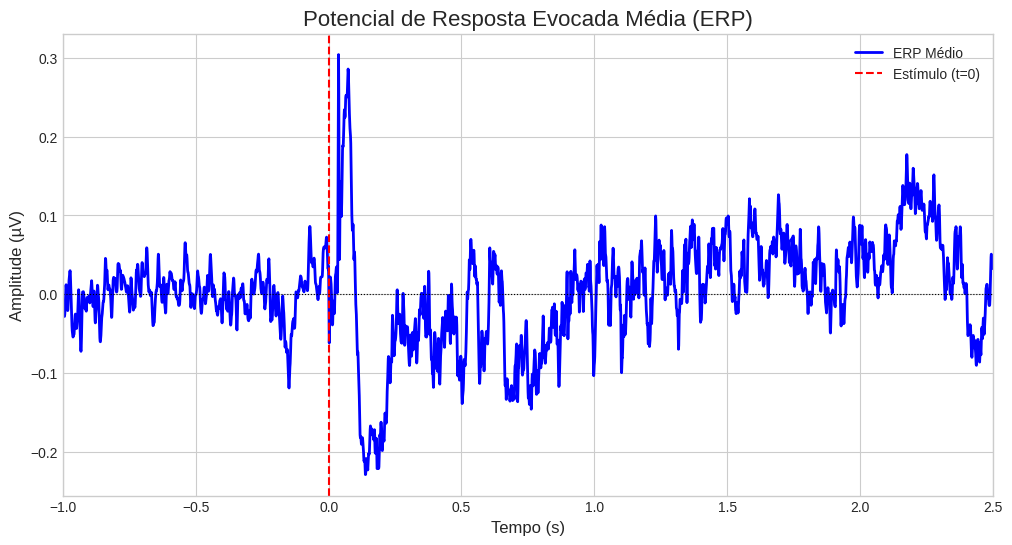

In [48]:
lfp_completa = GC['LFP']

pre_stimulus_sec = 1.0 

n_trias , n_samples = lfp_completa.shape

erp = np.mean(lfp_completa, axis=0)

total_duration_sec = n_samples / fs


# O tempo '0' corresponderá ao momento do estímulo.
time_vector = np.linspace(-pre_stimulus_sec, total_duration_sec - pre_stimulus_sec, n_samples)


#Garbege code for plotting the ERP

plt.style.use('seaborn-v0_8-whitegrid') 
fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(time_vector, erp, color='b', linewidth=2, label='ERP Médio')


ax.axvline(x=0, color='r', linestyle='--', linewidth=1.5, label='Estímulo (t=0)')


ax.axhline(y=0, color='k', linestyle=':', linewidth=0.8)
ax.set_title('Potencial de Resposta Evocada Média (ERP)', fontsize=16)
ax.set_xlabel('Tempo (s)', fontsize=12)
ax.set_ylabel('Amplitude (µV)', fontsize=12) # 
ax.legend()

ax.set_xlim(time_vector[0], time_vector[-1])

plt.show()

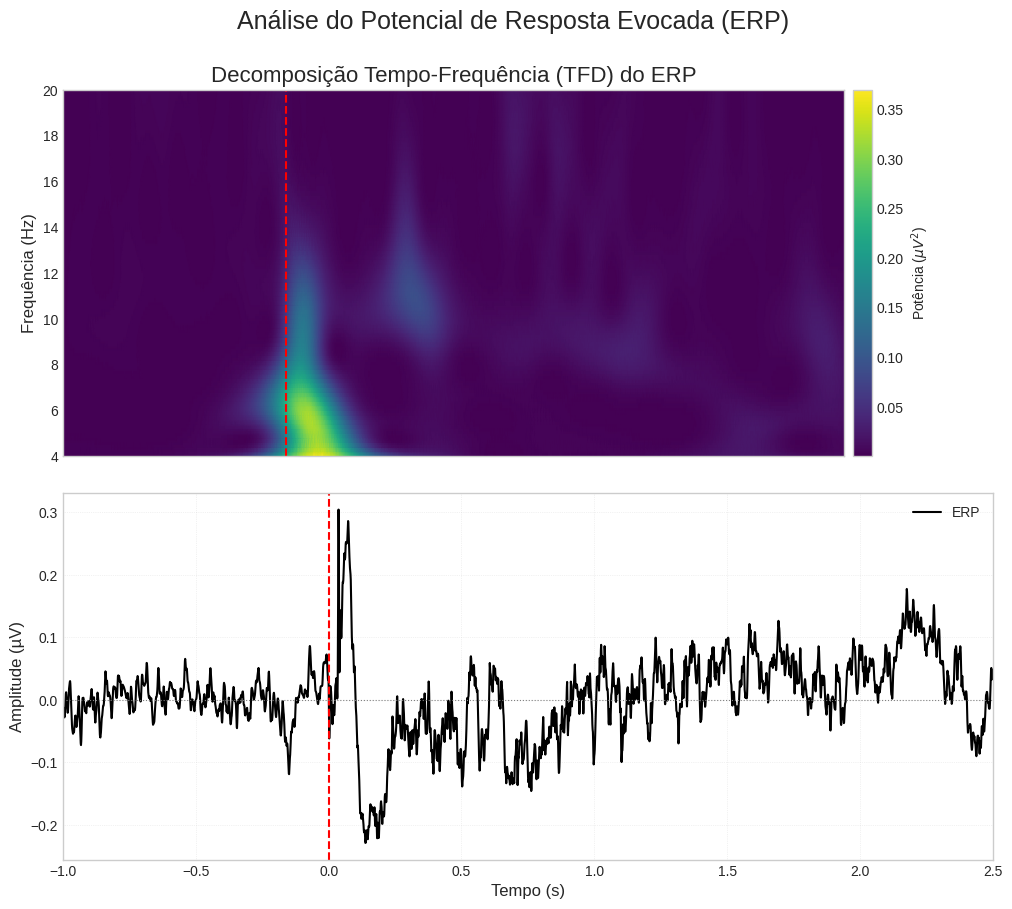

In [ ]:
# Parâmetros
fs = 1000
pre_stimulus_sec = 1.0

# Cálculo do ERP
lfp_trials = GC['LFP']
n_trials, n_samples = lfp_trials.shape
erp = np.mean(lfp_trials, axis=0)
total_duration_sec = n_samples / fs
time_vector = np.linspace(-pre_stimulus_sec, total_duration_sec - pre_stimulus_sec, n_samples)


# Vetor de frequências desejadas: 4 a 20 Hz, com passo de 0.2 Hz
frequencies = np.arange(4, 20.2, 0.2) 

# Nome da wavelet de Morlet complexa em PyWavelets. '1.5' é o parâmetro de largura de banda
wavelet_name = 'cmor1.5-1.0'


# A CWT opera em escalas, não em frequências. Precisamos converter.
# A relação é: Frequência = FrequênciaCentralDaWavelet / (Escala * PeríodoDeAmostragem)
sampling_period = 1 / fs
scales = pywt.central_frequency(wavelet_name) / (frequencies * sampling_period)


# A função retorna os coeficientes complexos e as frequências reais correspondentes às escalas
coefficients, freqs_from_cwt = pywt.cwt(erp, scales, wavelet_name, sampling_period=sampling_period)


# A potência é o módulo ao quadrado dos coeficientes complexos
power = np.abs(coefficients)**2


# Cria a figura com 2 subplots, como solicitado (2 linhas, 1 coluna)
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'hspace': 0.1})


ax1 = axs[0]
im = ax1.pcolormesh(time_vector, freqs_from_cwt, power, shading='gouraud', cmap='viridis')


ax1.axvline(x=0, color='r', linestyle='--', linewidth=1.5, label='Estímulo (t=0)')


ax1.set_title('Decomposição Tempo-Frequência (TFD) do ERP', fontsize=16)
ax1.set_ylabel('Frequência (Hz)', fontsize=12)
ax1.set_ylim(4, 20) 
ax1.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)


cbar = fig.colorbar(im, ax=ax1, orientation='vertical', pad=0.01)
cbar.set_label('Potência ($µV^2$)')



ax2 = axs[1]

ax2.plot(time_vector, erp, color='k', linewidth=1.5, label='ERP')
ax2.axvline(x=0, color='r', linestyle='--', linewidth=1.5)
ax2.axhline(y=0, color='gray', linestyle=':', linewidth=0.8)
ax2.set_xlabel('Tempo (s)', fontsize=12)
ax2.set_ylabel('Amplitude (µV)', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)
ax2.set_xlim(time_vector[0], time_vector[-1])


plt.suptitle('Análise do Potencial de Resposta Evocada (ERP)', fontsize=18, y=0.96)
plt.show()


Calculando TFD para cada um dos 144 trials...
Cálculo concluído.


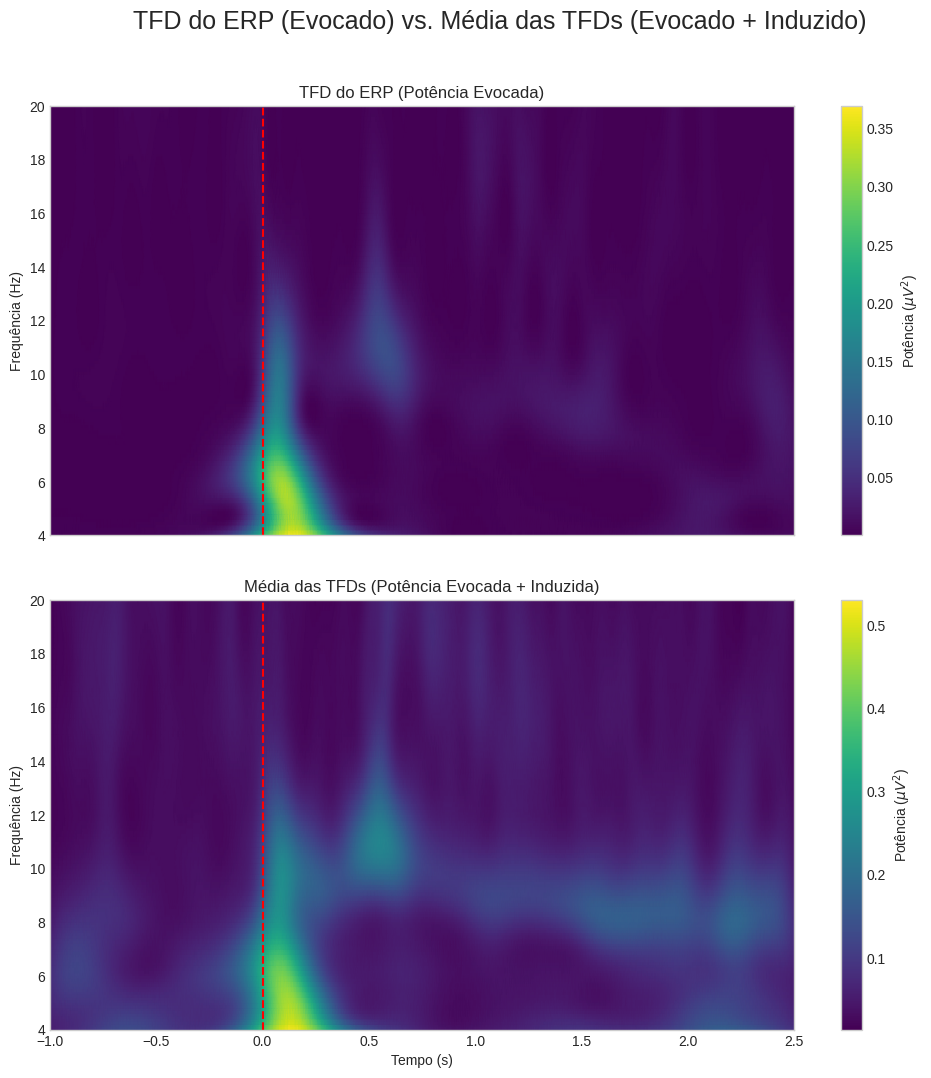

In [ ]:
fs = 1000
pre_stimulus_sec = 1.0
lfp_trials = GC['LFP']
n_trials, n_samples = lfp_trials.shape
erp = np.mean(lfp_trials, axis=0)
time_vector = np.linspace(-pre_stimulus_sec, (n_samples/fs) - pre_stimulus_sec, n_samples)

# Parâmetros da TFD
frequencies = np.arange(4, 20.2, 0.2)
wavelet_name = 'cmor1.5-1.0'
sampling_period = 1 / fs
scales = pywt.central_frequency(wavelet_name) / (frequencies * sampling_period)


#  fazendo um loop para calcular a tfd em 144 canais 

tfd_list = []
print("Calculando TFD para cada um dos {} trials...".format(n_trials))

for i in range(n_trials):
    # Extrai o sinal do trial atual
    trial_signal = lfp_trials[i, :]
    
    # Calcula a CWT para este trial
    coeffs, _ = pywt.cwt(trial_signal, scales, wavelet_name, sampling_period=sampling_period)
    
    # Calcula a potência e adiciona à lista
    power = np.abs(coeffs)**2
    tfd_list.append(power)
    
print("Cálculo concluído.")


# Converte a lista de matrizes de potência em um array 3D e calcula a média no eixo 0 
average_tfd_power = np.mean(np.array(tfd_list), axis=0)


# Pega os resultados da TFD do ERP do exercício anterior para o subplot superior
coeffs_erp, freqs_from_cwt = pywt.cwt(erp, scales, wavelet_name, sampling_period=sampling_period)
power_erp = np.abs(coeffs_erp)**2


fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True, sharey=True,
                      gridspec_kw={'hspace': 0.15})
fig.suptitle('TFD do ERP (Evocado) vs. Média das TFDs (Evocado + Induzido)', fontsize=18, y=0.96)



ax1 = axs[0]
im1 = ax1.pcolormesh(time_vector, freqs_from_cwt, power_erp, shading='gouraud', cmap='viridis')
ax1.axvline(x=0, color='r', linestyle='--', linewidth=1.5)
ax1.set_title('TFD do ERP (Potência Evocada)')
ax1.set_ylabel('Frequência (Hz)')
fig.colorbar(im1, ax=ax1).set_label('Potência ($µV^2$)')



ax2 = axs[1]
im2 = ax2.pcolormesh(time_vector, freqs_from_cwt, average_tfd_power, shading='gouraud', cmap='viridis')
ax2.axvline(x=0, color='r', linestyle='--', linewidth=1.5)
ax2.set_title('Média das TFDs (Potência Evocada + Induzida)')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Frequência (Hz)')
fig.colorbar(im2, ax=ax2).set_label('Potência ($µV^2$)')

plt.show()

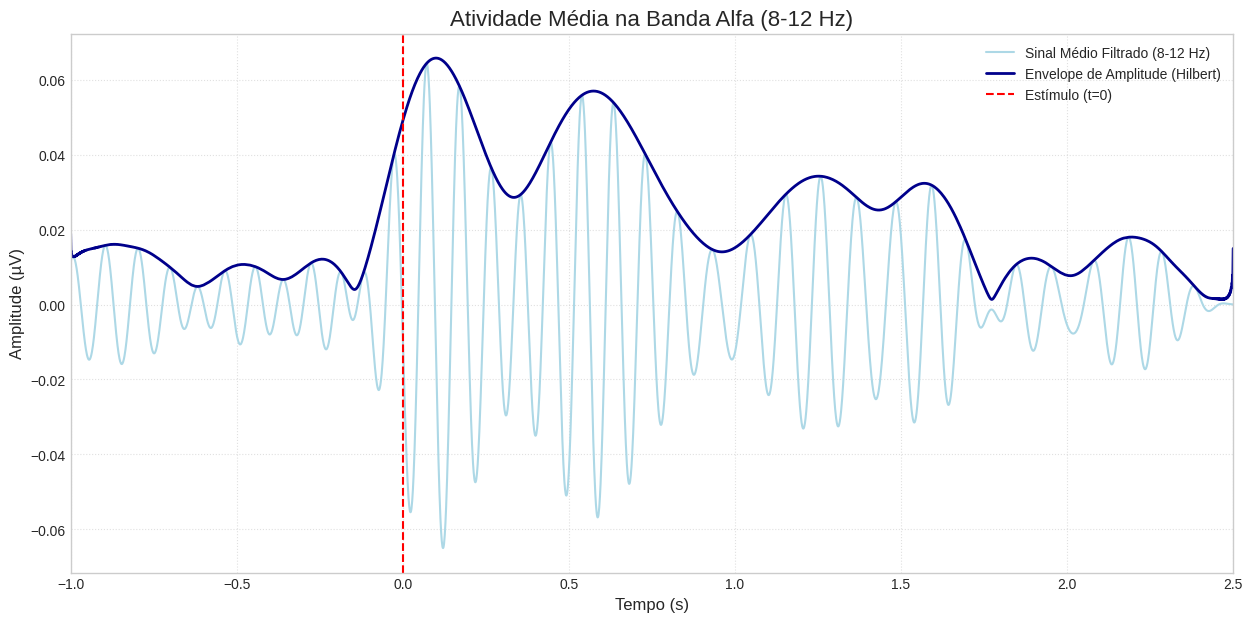

In [ ]:
low_cut_hz = 8.0
high_cut_hz = 12.0

# filtro passa banda 
b, a = sp.signal.butter(4, [low_cut_hz, high_cut_hz], btype='band', fs=fs)

# Aplica o filtro a cada trial usando filtfilt para não introduzir atraso de fase
filtered_trials = sp.signal.filtfilt(b, a, lfp_trials, axis=1)


# Calcula a média dos trials já filtrados
avg_filtered_signal = np.mean(filtered_trials, axis=0)


# Calcula a transformada de Hilbert do sinal médio filtrado
analytic_signal = sp.signal.hilbert(avg_filtered_signal)

amplitude_envelope = np.abs(analytic_signal)

### Plots
fig, ax = plt.subplots(figsize=(15, 7))


ax.plot(time_vector, avg_filtered_signal, color='lightblue', label='Sinal Médio Filtrado (8-12 Hz)')


ax.plot(time_vector, amplitude_envelope, color='darkblue', linewidth=2, label='Envelope de Amplitude (Hilbert)')


ax.axvline(x=0, color='r', linestyle='--', linewidth=1.5, label='Estímulo (t=0)')


ax.set_title('Atividade Média na Banda Alfa (8-12 Hz)', fontsize=16)
ax.set_xlabel('Tempo (s)', fontsize=12)
ax.set_ylabel('Amplitude (µV)', fontsize=12)
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)
ax.set_xlim(time_vector[0], time_vector[-1])

plt.show()


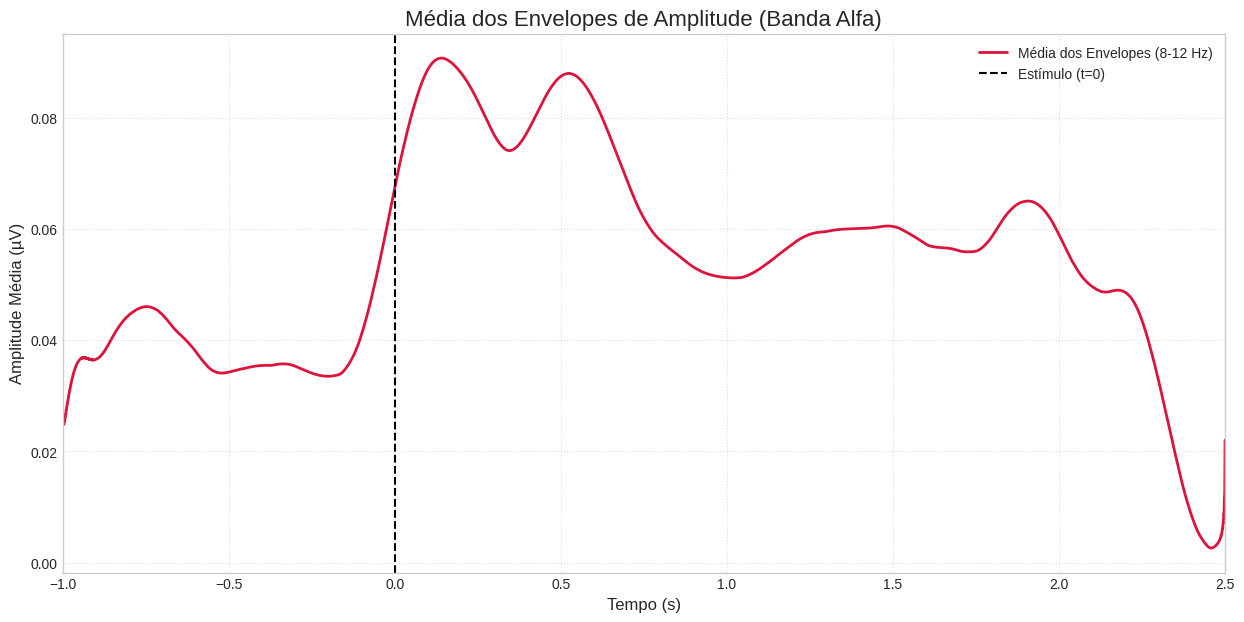

In [ ]:
### Mesmo código acima mas com algumas modificações para o exercício

fs = 1000
pre_stimulus_sec = 1.0
lfp_trials = GC['LFP']
time_vector = np.linspace(-pre_stimulus_sec, (lfp_trials.shape[1]/fs) - pre_stimulus_sec, lfp_trials.shape[1])

# Filtragem dos trials
low_cut_hz, high_cut_hz = 8.0, 12.0
b, a = sp.signal.butter(4, [low_cut_hz, high_cut_hz], btype='band', fs=fs)
filtered_trials = sp.signal.filtfilt(b, a, lfp_trials, axis=1)

envelope_list = []
for trial_signal in filtered_trials:
    analytic_signal = sp.signal.hilbert(trial_signal)
    envelope = np.abs(analytic_signal)
    envelope_list.append(envelope)

# Média dos envelopes
average_of_envelopes = np.mean(np.array(envelope_list), axis=0)


fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(time_vector, average_of_envelopes, color='crimson', linewidth=2, label='Média dos Envelopes (8-12 Hz)')
ax.axvline(x=0, color='k', linestyle='--', linewidth=1.5, label='Estímulo (t=0)')


ax.set_title('Média dos Envelopes de Amplitude (Banda Alfa)', fontsize=16)
ax.set_xlabel('Tempo (s)', fontsize=12)
ax.set_ylabel('Amplitude Média (µV)', fontsize=12)
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)
ax.set_xlim(time_vector[0], time_vector[-1])
plt.show()


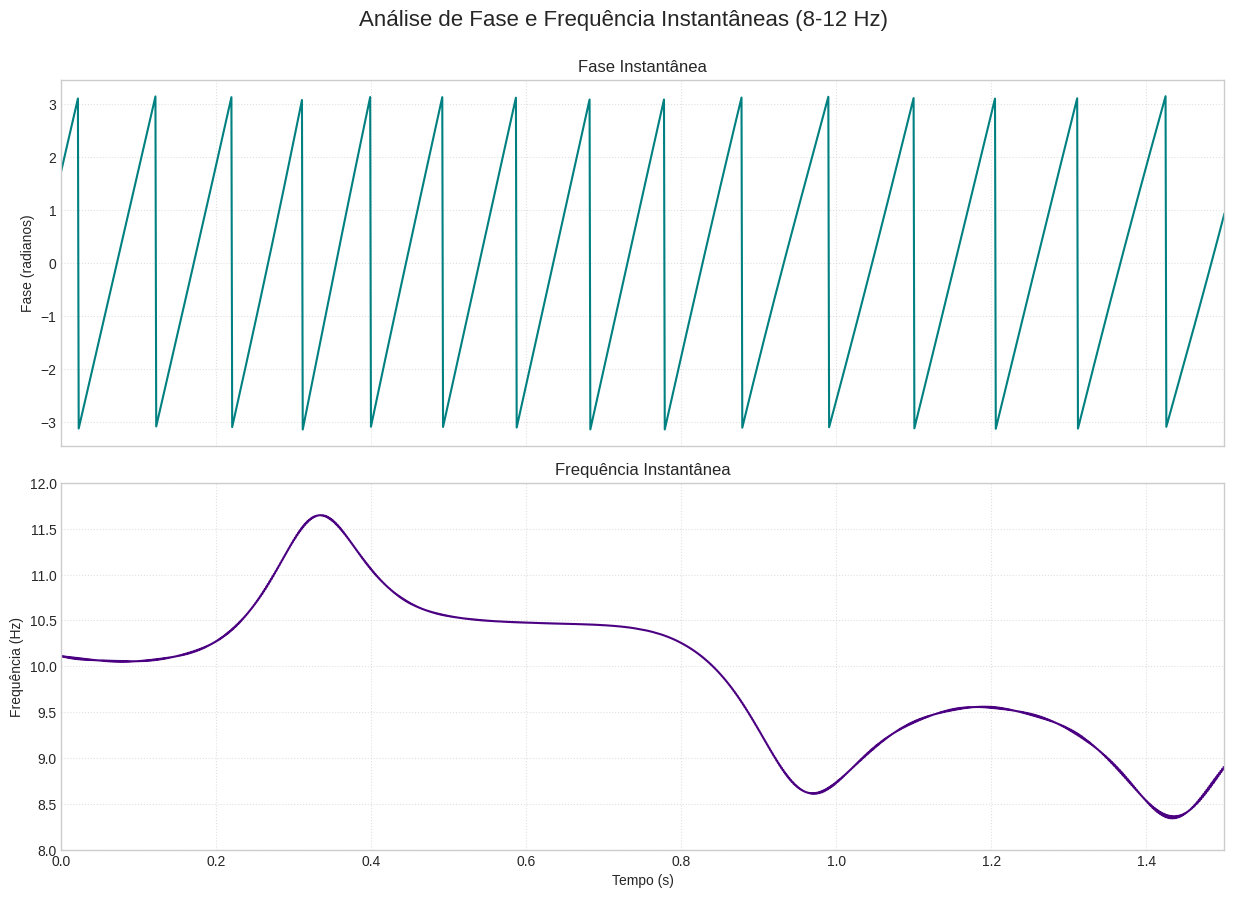

In [ ]:
fs = 1000
pre_stimulus_sec = 1.0
lfp_trials = GC['LFP']
time_vector = np.linspace(-pre_stimulus_sec, (lfp_trials.shape[1]/fs) - pre_stimulus_sec, lfp_trials.shape[1])

# Filtragem dos trials
low_cut_hz, high_cut_hz = 8.0, 12.0
b, a = sp.signal.butter(4, [low_cut_hz, high_cut_hz], btype='band', fs=fs)
filtered_trials = sp.signal.filtfilt(b, a, lfp_trials, axis=1)

###  Média do sinal filtrado
avg_filtered_signal = np.mean(filtered_trials, axis=0)


analytic_signal = sp.signal.hilbert(avg_filtered_signal)
# Fase instantânea (em radianos)
instantaneous_phase = np.angle(analytic_signal)
# Para calcular a frequência, primeiro "desembrulhamos" a fase para remover os saltos
unwrapped_phase = np.unwrap(instantaneous_phase)

instantaneous_frequency = (np.diff(unwrapped_phase) / (2.0 * np.pi)) * fs


fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.1})
fig.suptitle('Análise de Fase e Frequência Instantâneas (8-12 Hz)', fontsize=16, y=0.95)


time_limit = [0, 1.5]


ax1 = axs[0]
ax1.plot(time_vector, instantaneous_phase, color='teal')
ax1.set_title('Fase Instantânea')
ax1.set_ylabel('Fase (radianos)')
ax1.grid(True, linestyle=':', alpha=0.6)


ax2 = axs[1]
# O vetor de tempo para a frequência é menor em 1 ponto devido ao np.diff()
ax2.plot(time_vector[:-1], instantaneous_frequency, color='indigo')
ax2.set_title('Frequência Instantânea')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Frequência (Hz)')

ax2.set_ylim(8, 12)
ax2.grid(True, linestyle=':', alpha=0.6)


plt.xlim(time_limit)
plt.show()

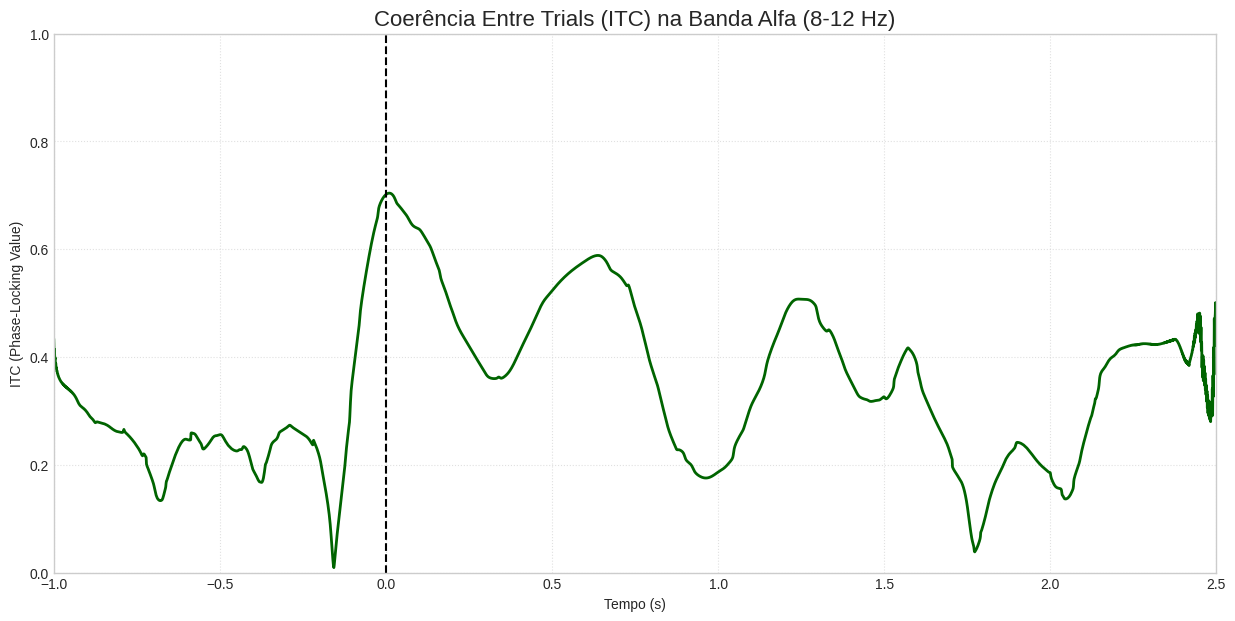

In [ ]:
fs = 1000
pre_stimulus_sec = 1.0
lfp_trials = GC['LFP']
time_vector = np.linspace(-pre_stimulus_sec, (lfp_trials.shape[1]/fs) - pre_stimulus_sec, lfp_trials.shape[1])

# Filtragem dos trials
low_cut_hz, high_cut_hz = 8.0, 12.0
b, a = sp.signal.butter(4, [low_cut_hz, high_cut_hz], btype='band', fs=fs)
filtered_trials = sp.signal.filtfilt(b, a, lfp_trials, axis=1)

# Calcula o sinal analítico para todos os trials de uma vez
analytic_trials = sp.signal.hilbert(filtered_trials, axis=1)

# Normaliza pela amplitude para obter apenas o fasor (vetor de fase unitário)
# Adiciona um epsilon para evitar divisão por zero onde a amplitude é nula
epsilon = 1e-10
phasors = analytic_trials / (np.abs(analytic_trials) + epsilon)

# ITC é o módulo da média dos fasores através dos trials
itc = np.abs(np.mean(phasors, axis=0))

### 2. Plot do ITC
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(time_vector, itc, color='darkgreen', linewidth=2)
ax.axvline(x=0, color='k', linestyle='--', linewidth=1.5, label='Estímulo (t=0)')


ax.set_title('Coerência Entre Trials (ITC) na Banda Alfa (8-12 Hz)', fontsize=16)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('ITC (Phase-Locking Value)')
ax.set_ylim(0, 1) #  0 a 1
ax.grid(True, linestyle=':', alpha=0.6)
ax.set_xlim(time_vector[0], time_vector[-1])
plt.show()